<a href="https://colab.research.google.com/github/AdilKhurshid/Electron/blob/main/DAT_540_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAT-540 

<h1>Project proposal - Electricity consumption segmentation and prediction using daily data</h1><br>
<b>Team - SquadTec</b><br>
<b>Team Members</b><br>
    1. Adil Khurshid - 261763<br>
      a.khurshid@stud.uis.no<br>
    2. Apoorva Ramesh - <br>
      p.anilkumar@stud.uis.no<br>
    3. Hina Ismat - 261769<br>
      h.ismat@stud.uis.no<br>
    4. Ali Tahir - 261877<br>
      al.tahir@stud.uis.no<br>
    5. Parvathy Anil Kumar - 258709<br>
      p.anilkumar@stud.uis.no<br>
    6. Muhammad Ahzaz Ahmed - 261765<br>
      m.ahzazamed@stud.uis.no

<h3>Abstract</h3>
    
The recent evolution of the electricity business regulation can be modeled to identify the consumption patterns of the customers. This project consists of three parts. The first part of the project deals with pre-processing of the data by handling the missing values and dropping the null values. In the next part, we are grouping customers with similar consumption behavior and analyzing their behavior using K-means clustering method. In the final part we have implemented LSTM prediction model to predict load consumption of each user. 

<h3>Introduction</h3>

This project is based on “Electricity consumption segmentation and prediction using daily data”. The recent development has changed our life style and has given us new possibilities to consume more energy in our daily life. This shift in the use of energy patterns has provided the electricity businesses with new possibilities of providing the dedicated tariff offers to its customers. Thus it is important to study the consumption patterns of the customers in order to provide better tariffs and offers to the customers with same consumption behaviors. The provided dataset for analysis contains a wide range of around 6445 Meter IDs in the span of around two year time from July 2009 to December 2010. Electric energy consumption is often measured in joules (J), or in Watts. The data set provided has the daily energy consumptions recorded as Kilo Watts where 1KW = 1000Watts. 
The purpose of the project is to group the customers with similar electricity consumption behaviors, analyze those behaviors and predict load consumption of each cluster.<br>
The project is divided into a number of sequential steps, where each step has its equal weight to the prediction:
1. Initially, we studied the data with different statistics and graphs. By looking at the data, we understood that the data is positively skewed where there are 3 main columns named “Meter ID”, “date” and “daily rate KW” with around 1048573 rows containing quite some missing records as well.
2. The next step is cleaning the data in which we ensured that the data is correct, consistent, and usable. Since we already know that we have missing values in our data that can cause irregularities in prediction. For some of the meter id's the missing data is above 80% when compared to other meter ids. So, a general approach is followed to drop all those meter id’s where missing values is around 80 percent of the whole data and then fill the rest of the missing values with two possible options, one option being the Interpolation method and 2nd being the mean values. 
3. The next step is to create clusters. Clustering or cluster analysis is an unsupervised learning method. It is often used as a data analysis technique for discovering interesting patterns in data, such as groups of customers based on their behavior. To analyze data and group customers with similar consumption behaviors, we have identified some features in our data that are “the percentage of consumption during the weekdays or the weekends”, “the percentage of consumption in different quarters”. 
4. To decide on what number of the clusters will be best suit for our data set we have studied and implemented three different methods i.e. elbow, BIC and silhouette. Among these BIC has been given us with the most optimal value of k in k-means
5. Now the next step is to create our clusters based on these features we have selected. There are many clustering algorithms available in the literature to choose from and no single best clustering algorithm for all cases. The best suit for our project is K-means clustering method. In K-means clustering the data is divided into several groups, data points in each group having similar characteristics. These clusters are formed by calculating the distance between data points. This distance is a measure of the relationship among numerous data points lying unclaimed. To better analyze these clusters and their data points we are using the dimensionality reduction analysis with PCA and TsNE. While both of the analysis techniques are used to fit and transform the data into a better fit for plotting and analyzing on to a 2D and 3D plots, we found PCA the best suit to our data set.
We are also analyzing our clusters using STL decomposition. STL stands for Seasonal and Trend decomposition using Loess. This is a statistical method of decomposing a Time Series data into 3 components containing seasonality, trend and residual. Trend gives you a general direction of the overall data. Whereas seasonality is a regular and predictable pattern that recur at a fixed interval of time. Randomness or Noise or Residual is the random fluctuation or unpredictable change. We are using LOESS (locally estimated scatter plot smoothing to extract smoothes estimates of the three components.
6. Lastly, we have implemented LSTM prediction model for the better predictions of the load consumption of each user from different clusters.


<h5>Data overview</h5>

1. Loading library and dataset<br>
    i. Handling missing data and Dropping NaN values
2. Segmentation of data<br>
    i. Pre-processing data for segmentation
    ii. Determining the number of cluster (Silhoutte, Elbow and BIC Method)
    iii. Clustering with Kmeans
    iv. Visualization of segments using STL Decomposition
    v. Analyzing each segment
3. Forecasting Single time-series<br>
    i. Prepocessing Data for forecasting
    ii. Forecasting electricity usage of each segment using Fbprophet
    iii. Forecasting electricity usage of all costumers using Fbprophet


importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import csv
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

### Importing data from CSV file 

In [ ]:
data_original = pd.read_csv('daily_electricity_usage.csv')
data_original['date'] = pd.to_datetime(data_original['date'])

In [ ]:
data_original.head(10)

,Meter ID,date,total daily KW
0,1000,2009-07-14,11.203
1,1000,2009-07-15,8.403
2,1000,2009-07-16,7.225
3,1000,2009-07-17,11.338
4,1000,2009-07-18,11.306
5,1000,2009-07-19,2.874
6,1000,2009-07-20,11.600
7,1000,2009-07-21,4.610
8,1000,2009-07-22,12.436
9,1000,2009-07-23,4.943


### Counting row and columns in given data

In [ ]:
rows, col = data_original.shape

In [ ]:
print("Number Rows", rows)
print("Number Rows", col)

Number Rows 3291258
Number Rows 3


In [ ]:
data_original.describe

<bound method NDFrame.describe of          Meter ID       date  total daily KW
0            1000 2009-07-14          11.203
1            1000 2009-07-15           8.403
2            1000 2009-07-16           7.225
3            1000 2009-07-17          11.338
4            1000 2009-07-18          11.306
...           ...        ...             ...
3291253      7444 2010-10-13          32.068
3291254      7444 2010-10-14          36.849
3291255      7444 2010-10-15          37.185
3291256      7444 2010-10-16          36.179
3291257      7444 2010-10-17          48.373

[3291258 rows x 3 columns]>

In [ ]:
data_original.info()

In [ ]:
data_original.dtypes

Meter ID                   int64
date              datetime64[ns]
total daily KW           float64
dtype: object

Observations
1. Its a time series data where the electricity consumption for each meter id is given daywise
2. The dataframe has 3 columns with 1048573 rows. We also observe missing values for few meters.
3. The given dataset contains Meter IDs from ID 1000 to ID 3058. The dataset provide daily electricity usage from July 14, 2009 to December 31, 2010. The costumers are not only from housing but also companies.

In [ ]:
#Notice that the data counts
datap = data_original.groupby('Meter ID')['total daily KW'].count() # We have groupby product names and count the quantities for them
print(datap)

We observed a lot of missing data in the dataset for each meter id. For some of these meter id's the missing data is above 80% when compared to other meter ids. Filling these meter ids with mean or interpolation method will impact our data analysis. Therefore we drop these meter id's for better results.

### Rounding of values 

In [ ]:
#Rounding the data in total daily KW to 3 decimal places
data_original['total daily KW'] = data_original['total daily KW'].apply(lambda x: round(x, 3))

### Counting data points

In [ ]:
#Notice that the data counts
MOP = data_original.groupby('Meter ID')['total daily KW'].count() # We have groupby product names and count the quantities for them
d = MOP.to_dict()
unwantedarray= []
desired_value = 100
for value in d.items(): # looping through every item in the dictionary 
    if value[1] < 100:
        unwantedarray.append(value[0])
print("Total Number of Meter Ids having less then 100 values : ",len(unwantedarray))


Total Number of Meter Ids having less then 100 values :  117


### Plotting

In [ ]:
data_original['month'] = pd.to_datetime(data_original['date']).dt.month
data_original['year'] = pd.to_datetime(data_original['date']).dt.year
data_original['year'].unique()

In [ ]:
sns.distplot(data_original['total daily KW']) # Energy consumption distribution

The above plot shows that our distribution is positively (right) skewed with mean = 3.387397e+01 and standard deviation = 5.426684e+01


In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x =data_original['date'], y =data_original['total daily KW'], data = data_original) # Energy distribution


The above plot shows that the energy consumption with respect to the Year/Month.

In [ ]:
data_original.hist(column='total daily KW', bins = 6)

The above plot shows us that the maximum energy consumption is between 0KW to 125KW

In [ ]:
#Plots of data points for visualization - Consuption with respect to meter id
plt.figure(figsize=(12,9))
plt.plot(data_original['Meter ID'], data_original['total daily KW'], 'ok')
plt.title('Data', fontsize=12)

The above plot depicts the daily energy consumption as points for each meter id. From these datapoints we observe, most of the daily consumption is between 0KW to 100KW as the plot is dense between these values.

### Rearranging DataFrame 

###### ! TODO: make it generic 

In [ ]:
data = pd.DataFrame({'date':pd.date_range('2009-07-14', periods=536, freq='D',)})
for i in range(1000,7445):
    if i in unwantedarray:
        pass
    else:
        S=data_original[data_original['Meter ID']==i][['date','total daily KW']]
        data=pd.merge(data,S,how='left',on='date')
r,c=data.shape
a=1
for x in range(1000,7445):
    if x in unwantedarray:
        pass
    elif(a<= c-1):
        data.columns.values[a]=str(x)
        a+=1

In [ ]:
rows , column = data.shape
print("The percentage of data we are dropping : ",str(len(unwantedarray)/(column-1)*100),"%")

The percentage of data we are dropping :  1.8489254108723134 %


In [ ]:
data

,date,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1238,1239,1240,1241,1242,1243,1244,1246,1247,1248,1249,1250,1251,1252,1254,1255,1257,1258,...,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220,7221,7222,7223,7224,7225,7226,7227,7228,7229,7230,7232,7233,7234,7235,7236,7237,7238,7239,7240,7241,7242,7243,7244,7245,7246,7247,7248,7249,7250,7251,7252,7253,7254,7255,7256,7257,7258,7259,7260,7261,7262,7263,7264,7265,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275,7276,7277,7278,7279,7280,7281,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340,7341,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361,7362,7363,7364,7365,7366,7367,7368,7369,7370,7371,7372,7373,7374,7375,7376,7377,7378,7379,7380,7381,7382,7383,7384,7385,7386,7387,7388,7389,7390,7391,7393,7394,7395,7396,7397,7398,7399,7400,7401,7402,7403,7404,7405,7406,7407,7408,7409,7410,7411,7412,7413,7414,7415,7416,7417,7418,7419,7420,7421,7422,7423,7424,7425,7427,7428,7429,7430,7431,7432,7433,7434,7435,7436,7437,7438,7439,7440,7441,7442,7443,7444
0,2009-07-14,11.203,6.744,6.355,24.183,50.057,17.765,12.056,30.399,27.217,51.865,38.259,49.387,16.889,34.085,15.670,5.002,16.193,50.537,23.977,30.642,19.102,18.392,68.649,11.801,2.838,35.990,6.592,239.145,3.603,18.871,3.956,13.588,41.499,49.974,7.619,8.634,11.457,278.584,32.991,11.023,46.689,12.175,51.948,11.422,23.255,23.480,28.941,6.796,36.809,33.035,15.206,14.339,8.225,49.221,139.751,34.405,13.358,34.338,4.919,19.160,21.257,25.373,33.999,4.265,NaN,21.095,30.803,1.794,NaN,10.675,22.434,43.316,12.115,5.125,20.806,15.858,10.591,37.904,15.448,11.246,17.225,18.391,9.086,20.755,4.046,13.717,8.139,25.618,85.459,41.014,6.395,2.427,30.335,9.719,26.899,40.104,10.554,9.935,22.986,2.451,30.398,126.100,44.428,15.256,4.362,50.724,70.316,13.777,20.557,4.126,1.928,NaN,11.245,22.298,42.334,20.357,33.677,4.086,8.326,17.271,12.645,5.796,NaN,10.493,3.664,24.830,NaN,34.353,18.768,21.419,17.536,27.316,11.145,72.529,49.306,29.965,22.189,37.462,101.498,31.844,24.987,27.255,167.823,10.599,21.220,10.747,22.090,NaN,18.124,5.013,21.668,39.499,11.709,33.609,6.605,9.286,1.122,23.213,29.763,31.563,13.086,18.490,13.490,27.017,54.519,20.372,46.358,86.866,22.415,17.247,62.404,30.225,439.624,11.841,10.680,24.595,56.052,4.768,27.083,2.848,24.609,52.842,NaN,24.958,46.474,46.901,14.853,10.618,15.387,14.517,29.798,6.997,17.057,13.489,25.284,16.060,27.995,51.187,4.555,17.268,11.352,14.062,0.384,23.938,8.530,29.482,16.779,14.694,7.455,26.935,19.080,42.244,13.462,34.251,11.945,21.524,18.143,14.257,11.092,19.1

In [ ]:
df_mean.isnull().sum().sum()

In [ ]:
# Plotting missing values for each meter ids
sns.heatmap(data.isnull(), cmap='viridis',annot=True)

The dataset contains 163262 missing data because:

- There are new customers in the middle of observation period;
- There are some Meter IDs between 1000-7444 not observed; or
- There are some meter IDs that stop to be member in the middle of observation period.
Based on these observations, we can decide to either fill these missing values ot drop them.

In [ ]:
# Assigning mean values in Null values 
df_mean = data.fillna(data.mean())

In [ ]:
df_mean = df_mean.dropna(axis='columns',how='any') #droping the missing values

In [ ]:
#p5 - Fill data with interpolation
data = data.interpolate(method='linear', axis=0).ffill().bfill()

0

In [ ]:
data.head()

Why we are choosing 'Linear-Interpolation',but not mean() or forward-fit() to populate our missing values?
- Interpolation is a good approximation for the timeseries data where the mean of the values before the missing data and after is calculated, and we make our judgement for that missing data point based on that calculation. 
- In the timeseries data, these points will be the best judge for the corresponding missing value. However, if we go for mean method to fill the missing data points, the mean is calculated from the whole data and it will be same always so it is not the correct prediction for a data point which lies in between. 
This can be seen clearly from the values above, where for mean() method the values remain the same for all the data points and usually it has the large numbers in the predictions, however in interpolation, the it is choosing the best fit between the points.
References:
1.https://leportella.com/missing-data/
2.https://en.wikipedia.org/wiki/Linear_interpolation

In [ ]:
df_mean

,date,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1238,1239,1240,1241,1242,1243,1244,1246,1247,1248,1249,1250,1251,1252,1254,1255,1257,1258,...,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220,7221,7222,7223,7224,7225,7226,7227,7228,7229,7230,7232,7233,7234,7235,7236,7237,7238,7239,7240,7241,7242,7243,7244,7245,7246,7247,7248,7249,7250,7251,7252,7253,7254,7255,7256,7257,7258,7259,7260,7261,7262,7263,7264,7265,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275,7276,7277,7278,7279,7280,7281,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340,7341,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361,7362,7363,7364,7365,7366,7367,7368,7369,7370,7371,7372,7373,7374,7375,7376,7377,7378,7379,7380,7381,7382,7383,7384,7385,7386,7387,7388,7389,7390,7391,7393,7394,7395,7396,7397,7398,7399,7400,7401,7402,7403,7404,7405,7406,7407,7408,7409,7410,7411,7412,7413,7414,7415,7416,7417,7418,7419,7420,7421,7422,7423,7424,7425,7427,7428,7429,7430,7431,7432,7433,7434,7435,7436,7437,7438,7439,7440,7441,7442,7443,7444
0,2009-07-14,11.203,6.744,6.355,24.183,50.057,17.765,12.056,30.399,27.217,51.865,38.259000,49.38700,16.889,34.085,15.670,5.002,16.193,50.537,23.977,30.642,19.102,18.392,68.649,11.801,2.838,35.990,6.592,239.145,3.603,18.871,3.956,13.588,41.499,49.974,7.619,8.634,11.457,278.584000,32.991,11.023,46.689,12.175000,51.948,11.422,23.255,23.480,28.941000,6.796,36.809,33.035,15.206,14.339,8.225,49.221,139.751,34.405,13.358,34.338,4.919,19.160,21.257,25.373,33.999,4.265,39.746033,21.095,30.803,1.794,68.39914,10.675,22.434,43.316,12.115,5.125,20.806,15.858,10.591,37.904,15.448,11.246,17.225,18.391,9.086,20.755,4.046,13.717,8.139,25.61800,85.459,41.014,6.395,2.427,30.335,9.719,26.899,40.104,10.554,9.935,22.986,2.451,30.398,126.100000,44.428,15.256000,4.362,50.724,70.316,13.777,20.557,4.126,1.928,22.755306,11.245,22.298000,42.334,20.357,33.677,4.086,8.326,17.271,12.645,5.796,48.544338,10.493,3.664,24.830,39.093748,34.353,18.768000,21.419,17.536,27.316,11.145,72.529,49.306,29.965,22.189,37.462,101.498,31.844,24.987,27.255,167.823,10.599,21.220,10.747,22.090000,56.229634,18.124,5.013,21.668,39.499,11.709,33.609,6.605,9.286,1.122,23.213,29.763,31.563,13.086,18.490,13.490,27.017,54.519,20.372,46.358,86.866,22.415000,17.247,62.404,30.225,439.624,11.841,10.680,24.595,56.052,4.768,27.083,2.848,24.609,52.842,30.877243,24.958,46.474,46.901000,14.853,10.618,15.387000,14.517,29.798,6.997,17.057,13.489,25.284,16.060,27.995,51.187,4.555,17.268,11.352000,14.062,0.384,23.938000,8.530,29.482000,16.7

In [ ]:
df_mean.to_csv(r'arrange.csv', index = False)

Loading data Arrange data

In [ ]:
df = pd.read_csv('arrange.csv')
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df

,date,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1238,1239,1240,1241,1242,1243,1244,1246,1247,1248,1249,1250,1251,1252,1254,1255,1257,1258,...,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220,7221,7222,7223,7224,7225,7226,7227,7228,7229,7230,7232,7233,7234,7235,7236,7237,7238,7239,7240,7241,7242,7243,7244,7245,7246,7247,7248,7249,7250,7251,7252,7253,7254,7255,7256,7257,7258,7259,7260,7261,7262,7263,7264,7265,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275,7276,7277,7278,7279,7280,7281,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340,7341,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361,7362,7363,7364,7365,7366,7367,7368,7369,7370,7371,7372,7373,7374,7375,7376,7377,7378,7379,7380,7381,7382,7383,7384,7385,7386,7387,7388,7389,7390,7391,7393,7394,7395,7396,7397,7398,7399,7400,7401,7402,7403,7404,7405,7406,7407,7408,7409,7410,7411,7412,7413,7414,7415,7416,7417,7418,7419,7420,7421,7422,7423,7424,7425,7427,7428,7429,7430,7431,7432,7433,7434,7435,7436,7437,7438,7439,7440,7441,7442,7443,7444
0,2009-07-14,11.203,6.744,6.355,24.183,50.057,17.765,12.056,30.399,27.217,51.865,38.259000,49.38700,16.889,34.085,15.670,5.002,16.193,50.537,23.977,30.642,19.102,18.392,68.649,11.801,2.838,35.990,6.592,239.145,3.603,18.871,3.956,13.588,41.499,49.974,7.619,8.634,11.457,278.584000,32.991,11.023,46.689,12.175000,51.948,11.422,23.255,23.480,28.941000,6.796,36.809,33.035,15.206,14.339,8.225,49.221,139.751,34.405,13.358,34.338,4.919,19.160,21.257,25.373,33.999,4.265,39.746033,21.095,30.803,1.794,68.39914,10.675,22.434,43.316,12.115,5.125,20.806,15.858,10.591,37.904,15.448,11.246,17.225,18.391,9.086,20.755,4.046,13.717,8.139,25.61800,85.459,41.014,6.395,2.427,30.335,9.719,26.899,40.104,10.554,9.935,22.986,2.451,30.398,126.100000,44.428,15.256000,4.362,50.724,70.316,13.777,20.557,4.126,1.928,22.755306,11.245,22.298000,42.334,20.357,33.677,4.086,8.326,17.271,12.645,5.796,48.544338,10.493,3.664,24.830,39.093748,34.353,18.768000,21.419,17.536,27.316,11.145,72.529,49.306,29.965,22.189,37.462,101.498,31.844,24.987,27.255,167.823,10.599,21.220,10.747,22.090000,56.229634,18.124,5.013,21.668,39.499,11.709,33.609,6.605,9.286,1.122,23.213,29.763,31.563,13.086,18.490,13.490,27.017,54.519,20.372,46.358,86.866,22.415000,17.247,62.404,30.225,439.624,11.841,10.680,24.595,56.052,4.768,27.083,2.848,24.609,52.842,30.877243,24.958,46.474,46.901000,14.853,10.618,15.387000,14.517,29.798,6.997,17.057,13.489,25.284,16.060,27.995,51.187,4.555,17.268,11.352000,14.062,0.384,23.938000,8.530,29.482000,16.7

In [ ]:
print(len(np.sum(df_mean[uniq_meter_ids]).values))

We are looking at the different meter id's we have in our dataset.

### ! Todo we need handle exception here

Dropping unwanted Meter IDs 

### !TODO compare the missing values in columns 

In [ ]:
df_inter

,date,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1238,1239,1240,1241,1242,1243,1244,1246,1247,1248,1249,1250,1251,1252,1254,1255,1257,1258,...,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220,7221,7222,7223,7224,7225,7226,7227,7228,7229,7230,7232,7233,7234,7235,7236,7237,7238,7239,7240,7241,7242,7243,7244,7245,7246,7247,7248,7249,7250,7251,7252,7253,7254,7255,7256,7257,7258,7259,7260,7261,7262,7263,7264,7265,7266,7267,7268,7269,7270,7271,7272,7273,7274,7275,7276,7277,7278,7279,7280,7281,7282,7283,7284,7285,7286,7287,7288,7289,7290,7291,7292,7293,7294,7295,7296,7297,7298,7299,7300,7301,7302,7303,7304,7305,7306,7307,7308,7309,7310,7311,7312,7313,7314,7315,7316,7317,7318,7319,7320,7321,7322,7323,7324,7325,7326,7327,7328,7329,7330,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340,7341,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361,7362,7363,7364,7365,7366,7367,7368,7369,7370,7371,7372,7373,7374,7375,7376,7377,7378,7379,7380,7381,7382,7383,7384,7385,7386,7387,7388,7389,7390,7391,7393,7394,7395,7396,7397,7398,7399,7400,7401,7402,7403,7404,7405,7406,7407,7408,7409,7410,7411,7412,7413,7414,7415,7416,7417,7418,7419,7420,7421,7422,7423,7424,7425,7427,7428,7429,7430,7431,7432,7433,7434,7435,7436,7437,7438,7439,7440,7441,7442,7443,7444
0,2009-07-14,11.203,6.744,6.355,24.183,50.057,17.765,12.056,30.399,27.217,51.865,38.259000,49.38700,16.889,34.085,15.670,5.002,16.193,50.537,23.977,30.642,19.102,18.392,68.649,11.801,2.838,35.990,6.592,239.145,3.603,18.871,3.956,13.588,41.499,49.974,7.619,8.634,11.457,278.584000,32.991,11.023,46.689,12.175000,51.948,11.422,23.255,23.480,28.941000,6.796,36.809,33.035,15.206,14.339,8.225,49.221,139.751,34.405,13.358,34.338,4.919,19.160,21.257,25.373,33.999,4.265,39.746033,21.095,30.803,1.794,68.39914,10.675,22.434,43.316,12.115,5.125,20.806,15.858,10.591,37.904,15.448,11.246,17.225,18.391,9.086,20.755,4.046,13.717,8.139,25.61800,85.459,41.014,6.395,2.427,30.335,9.719,26.899,40.104,10.554,9.935,22.986,2.451,30.398,126.100000,44.428,15.256000,4.362,50.724,70.316,13.777,20.557,4.126,1.928,22.755306,11.245,22.298000,42.334,20.357,33.677,4.086,8.326,17.271,12.645,5.796,48.544338,10.493,3.664,24.830,39.093748,34.353,18.768000,21.419,17.536,27.316,11.145,72.529,49.306,29.965,22.189,37.462,101.498,31.844,24.987,27.255,167.823,10.599,21.220,10.747,22.090000,56.229634,18.124,5.013,21.668,39.499,11.709,33.609,6.605,9.286,1.122,23.213,29.763,31.563,13.086,18.490,13.490,27.017,54.519,20.372,46.358,86.866,22.415000,17.247,62.404,30.225,439.624,11.841,10.680,24.595,56.052,4.768,27.083,2.848,24.609,52.842,30.877243,24.958,46.474,46.901000,14.853,10.618,15.387000,14.517,29.798,6.997,17.057,13.489,25.284,16.060,27.995,51.187,4.555,17.268,11.352000,14.062,0.384,23.938000,8.530,29.482000,16.7

In [ ]:
missing_values = df_mean.isnull().sum().sum()
print("Total Number of Missing values: ", missing_values)

Total Number of Missing values:  0


In [ ]:
missing_values = df_inter.isnull().sum().sum()
print("Total Number of Missing values: ", missing_values)

Total Number of Missing values:  0


### Extracting Features 

In [ ]:
df_inter = df_mean
df_inter.date = pd.to_datetime(df_inter.date)
df_inter['day'] = df_inter['date'].apply(lambda x:x.weekday()) # populating days in days column
df_inter['months'] = df_inter['date'].dt.to_period('M') # assigning months values to months column
df_inter['quarter'] = df_inter['date'].dt.quarter # populating quarter in quarter column
df_inter['quarter'] = pd.cut(df_inter['quarter'], bins=[0, 1, 2, 3, 4], labels=['First', 'Second', 'Third', 'Fourth'])
uniq_meter_ids = df_inter.columns[1:-3] #Just selec 

In [ ]:
uniq_meter_ids

Index(['1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008',
       '1009',
       ...
       '7435', '7436', '7437', '7438', '7439', '7440', '7441', '7442', '7443',
       '7444'],
      dtype='object', length=6318)

In [ ]:
data_featured = pd.DataFrame({'Meter ID':uniq_meter_ids.values, 'total KW':np.sum(df_inter[uniq_meter_ids]).values})
data_featured['average per day']= df_inter[uniq_meter_ids].mean().values
data_featured['% Monday']= df_inter[df_inter['day'] == 0][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% Tuesday']= df_inter[df_inter['day'] == 1][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% Wednesday']= df_inter[df_inter['day'] == 2][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% Thursday']= df_inter[df_inter['day'] == 3][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% Friday']= df_inter[df_inter['day'] == 4][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% Saturday']= df_inter[df_inter['day'] == 5][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% Sunday']= df_inter[df_inter['day'] == 6][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% weekday']= df_inter[(df_inter['day'] != 5) & (df_inter['day'] != 6)][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% weekend']= df_inter[(df_inter['day'] == 5) | (df_inter['day'] == 6)][uniq_meter_ids].sum().values / data_featured['total KW'] * 100

# For Months
data_featured['% January']= df_inter[df_inter['months'].dt.month == 1][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% Feb']= df_inter[df_inter['months'].dt.month == 2][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% March']= df_inter[df_inter['months'].dt.month == 3][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% April']= df_inter[df_inter['months'].dt.month == 4][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% May']= df_inter[df_inter['months'].dt.month == 5][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% June']= df_inter[df_inter['months'].dt.month == 6][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% July']= df_inter[df_inter['months'].dt.month == 7][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% August']= df_inter[df_inter['months'].dt.month == 8][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% September']= df_inter[df_inter['months'].dt.month == 9][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% October']= df_inter[df_inter['months'].dt.month == 10][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% November']= df_inter[df_inter['months'].dt.month == 11][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['% December']= df_inter[df_inter['months'].dt.month == 12][uniq_meter_ids].sum().values / data_featured['total KW'] * 100

# For Quarters
data_featured['%Q1']= df_inter[(df_inter['quarter'] == 'First')][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['%Q2']= df_inter[(df_inter['quarter'] == 'Second')][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['%Q3']= df_inter[(df_inter['quarter'] == 'Third')][uniq_meter_ids].sum().values / data_featured['total KW'] * 100
data_featured['%Q4']= df_inter[(df_inter['quarter'] == 'Fourth')][uniq_meter_ids].sum().values / data_featured['total KW'] * 100

data_featured=data_featured.fillna(0)

In [ ]:
data_featured

,Meter ID,total KW,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend,% January,% Feb,% March,% April,% May,% June,% July,% August,% September,% October,% November,% December,%Q1,%Q2,%Q3,%Q4
0,1000,5515.675000,10.290438,13.818961,14.649395,14.792587,12.848944,13.900039,15.455497,14.534576,70.009926,29.990074,8.817361,5.677528,5.386974,4.574907,4.297606,4.139675,7.490615,9.862601,9.633164,11.897837,12.240315,15.981417,19.881864,13.012188,26.986380,40.119568
1,1001,5090.375000,9.496968,14.126091,14.361830,14.289969,14.611595,14.851637,13.891904,13.866974,72.241122,27.758878,4.434251,2.733433,4.750082,2.964929,2.491604,2.397996,4.861194,6.040419,5.998497,6.307276,13.758908,43.261410,11.917766,7.854529,16.900111,63.327594
2,1002,5352.830000,9.986623,15.714585,14.486150,16.015827,15.183408,13.964968,12.886305,11.748757,75.364938,24.635062,7.013131,5.777841,5.774123,4.539711,5.922120,5.965648,9.102643,10.707588,10.402404,10.048404,12.804031,11.942356,18.565095,16.427479,30.212635,34.794791
3,1003,16305.581000,30.420860,14.545051,14.048454,14.216507,14.363180,14.000151,14.630714,14.195943,71.173342,28.826658,6.762225,5.799192,6.449215,6.003380,6.202208,4.469169,7.952903,9.829622,9.986219,11.219833,11.866054,13.459980,19.010632,16.674757,27.768744,36.545867
4,1004,25326.442000,47.250825,14.630796,14.177041,14.400305,13.674076,12.893055,14.671563,15.553164,69.775273,30.224727,6.016668,5.100523,5.224563,4.455182,5.549449,4.982018,8.884059,11.663901,11.908878,11.931336,11.716328,12.567095,16.341755,14.986649,32.456837,36.214759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,7440,19534.086191,36.444191,13.373172,14.637307,13.836977,13.252890,14.388372,13.099481,17.411800,69.488719,30.511281,6.270091,5.703476,5.749929,5.046870,5.293823,5.331066,8.915468,10.810109,10.861378,11.575730,11.728401,12.713658,17.723496,15.671759,30.586955,36.017789
6314,7441,10156.083000,18.947916,14.173703,14.170148,14.105901,14.222176,14.261807,14.517260,14.549005,70.933735,29.066265,7.503552,6.165950,5.954658,4.882168,4.764632,4.354563,7.501238,10.385106,11.148314,11.212246,12.027304,14.100269,19.624160,14.001363,29.034658,37.339819
6315,7442,21951.723000,40.954707,13.309256,14.286605,14.488799,13.582660,13.455518,16.035411,14.841751,69.122838,30.877162,6.054076,5.108998,5.330379,5.034498,5.056200,4.370454,8.405919,10.513261,10.629881,12.356994,12.959024,14.180317,16.493452,14.461152,29.549061,39.496335
6316,7443,4737.095000,8.837864,12.805485,13.184705,14.930670,13.835209,13.510031,13.898919,17.834981,68.266100,31.733900,6.778163,5.683990,5.314291,4.822365,5.333269,5.399955,7.675084,10.541418,9.452122,11.279233,13.239295,14.480816,17.776443,15.555588,27.668624,38.999345


We built 11 variables to detect the consumption behavior of every costumers. Those are:
1. Total consumption in the observation period (total KW);
2. The average of daily electricity usage (average per day);
3. The percentage of total consumption on Monday (% Monday);
4. The percentage of total consumption on Tuesday (% Tuesday);
5. The percentage of total consumption on Wednesday (% Wednesday);
6. The percentage of total consumption on Thursday (% Thursday);
7. The percentage of total consumption on Friday (% Friday);
8. The percentage of total consumption on Saturday (% Saturday);
9. The percentage of total consumption on Sunday (% Sunday);
10. The percentage of total consumption on Weekday (% weekday); and
11. The percentage of total consumption on Weekend (% weekend).

### Coreleation plot

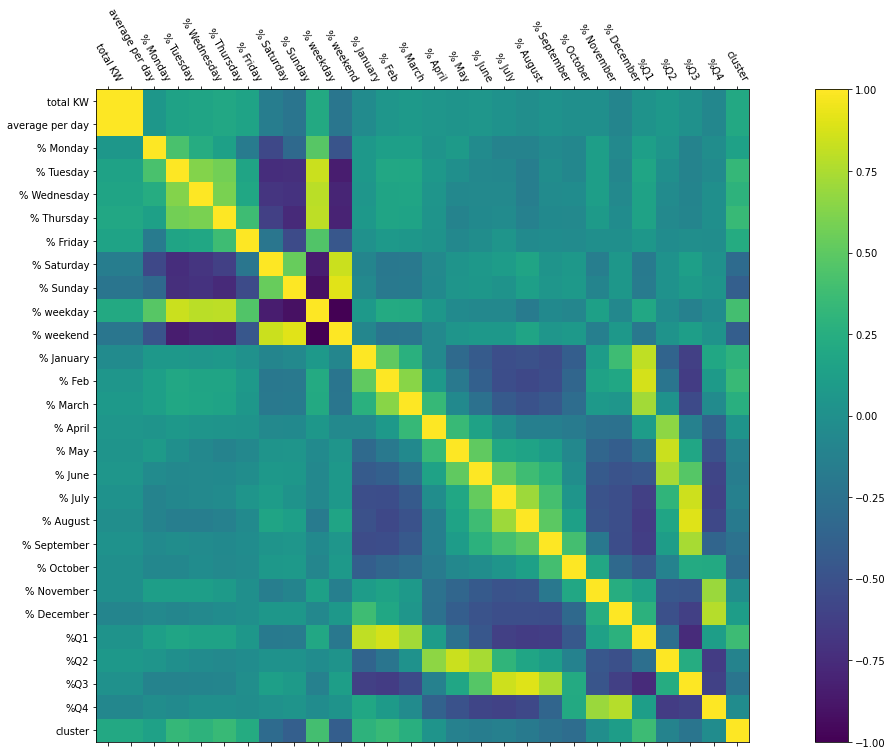

In [ ]:
cells = data_featured.columns[1:]
corr = data_featured[cells].corr()
fig, ax = plt.subplots(figsize=(24, 12))
cax=ax.matshow(corr,vmin=-1,vmax=1)
ax.matshow(corr_month)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks(rotation=300)
plt.colorbar(cax)

As we can guess "total KW" has strong positive correlation with "average per day". Beside that, "% Saturday" and "% Sunday" also have strong positive correlation with "% weekend" and negative correlation with "% weekday". So does "% Monday" until "% Friday" have positive corralation with "% weekday" and "% weekend".

In [ ]:
from sklearn.preprocessing import StandardScaler
df_columns = data_featured.columns[1:]
scaller = StandardScaler()
matrix = pd.DataFrame(scaller.fit_transform(data_featured[df_columns]), columns = df_columns)
matrix['Meter ID'] = data_featured['Meter ID']
matrix

,total KW,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend,% January,% Feb,% March,% April,% May,% June,% July,% August,% September,% October,% November,% December,%Q1,%Q2,%Q3,%Q4,Meter ID
0,-0.467861,-0.467861,-0.285548,0.145468,0.343152,-1.044697,-0.290063,0.499697,0.110633,-0.320049,0.320049,0.854666,-0.103835,-0.399959,-0.499276,-0.639911,-0.511516,-0.239918,-0.161802,-0.341916,0.396945,0.054941,0.448341,0.278499,-0.736068,-0.287063,0.530680,1000
1,-0.483146,-0.483146,-0.045842,-0.060786,-0.025477,0.286775,0.476500,-0.197484,-0.121942,0.176449,-0.176449,-1.220318,-1.992539,-0.884732,-1.886161,-2.113854,-2.000611,-1.632165,-1.799403,-2.350560,-3.006785,0.872268,8.393951,-1.705323,-2.671081,-2.284631,5.900973,1001
2,-0.473713,-0.473713,1.193935,0.028382,1.240299,0.718711,-0.237759,-0.645865,-0.859874,0.871577,-0.871577,0.000536,-0.039482,-0.105279,-0.529595,0.685913,1.049649,0.613631,0.200231,0.083193,-0.729055,0.358340,-0.728081,-0.049502,0.545256,0.351891,-0.701463,1002
3,-0.080091,-0.080091,0.281145,-0.285554,-0.079356,0.099127,-0.209417,0.131939,-0.007338,-0.061159,0.061159,-0.118245,-0.025785,0.408571,0.731255,0.914503,-0.229806,0.004858,-0.175931,-0.146805,-0.015847,-0.146491,-0.286056,0.061479,0.638028,-0.132117,-0.296267,1003
4,0.244103,0.244103,0.348067,-0.193326,0.055446,-0.421409,-1.101243,0.150153,0.465482,-0.372265,0.372265,-0.471195,-0.473997,-0.523579,-0.602411,0.381763,0.208668,0.497894,0.609960,0.915724,0.417341,-0.227076,-0.546119,-0.603327,0.004696,0.796351,-0.372885,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,0.035936,0.035936,-0.633475,0.136798,-0.357710,-0.739564,0.103316,-0.550813,1.112982,-0.436030,0.436030,-0.351223,-0.087189,-0.123695,-0.092712,0.173137,0.507095,0.514525,0.244155,0.336839,0.200835,-0.220578,-0.503430,-0.259141,0.261731,0.426024,-0.418464,7440
6314,-0.301093,-0.301093,-0.008682,-0.198269,-0.160476,-0.007385,0.001361,0.081352,0.115659,-0.114478,0.114478,0.232703,0.209498,0.032136,-0.234592,-0.258754,-0.327792,-0.234293,0.062064,0.495409,-0.020467,-0.059704,-0.099564,0.214306,-0.364957,0.118595,-0.112549,7441
6315,0.122822,0.122822,-0.683360,-0.114741,0.120348,-0.490462,-0.648149,0.758271,0.217644,-0.517448,0.517448,-0.453486,-0.468561,-0.443037,-0.103370,-0.020795,-0.314205,0.244724,0.116972,0.208905,0.676496,0.441760,-0.076249,-0.565540,-0.192456,0.220471,0.386465,7442
6316,-0.495842,-0.495842,-1.076540,-0.905074,0.444424,-0.299692,-0.604235,-0.194356,1.260407,-0.708094,0.708094,-0.110700,-0.099690,-0.455282,-0.286108,0.205330,0.565994,-0.142244,0.129036,-0.441966,0.020317,0.592606,0.011274,-0.245952,0.218146,-0.151946,0.271463,7443


Finding k means using Elbow method with  Bayesian Information Criterion and Distortion techniques

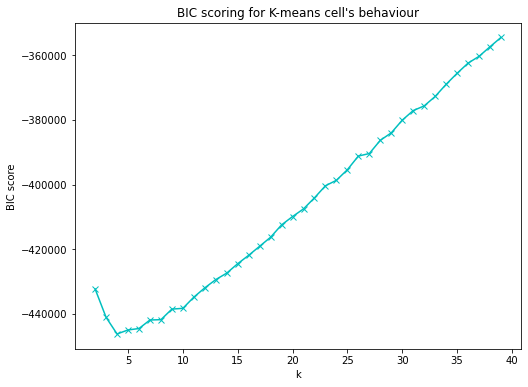

In [ ]:
#Finding k value using BIC method
def plot_BIC(matrix, x_calls, K):
    from sklearn import mixture
    BIC=[]
    for k in K:
        model=mixture.GaussianMixture(n_components=k, init_params='kmeans')
        model.fit(matrix[x_calls])
        BIC.append(model.bic(matrix[x_calls]))
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(K,BIC,'-cx')
    plt.ylabel("BIC score")
    plt.xlabel("k")
    plt.title("BIC scoring for K-means cell's behaviour")
    return(BIC)

K = range(2, 40)
BIC = plot_BIC(matrix, df_columns, K)

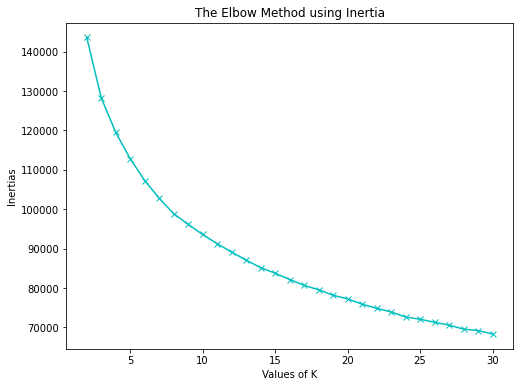

In [ ]:
# finding K value using distrotion inertia technique
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 31)
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel = kmeanModel.fit(matrix)
    kmeanModel.fit(matrix[df_columns])

   # distortions.append(sum(np.min(cdist(matrix[df_columns], kmeanModel.cluster_centers_,
    #                                    'euclidean'), axis=1)) / matrix[df_columns].shape[0])
    inertias.append(kmeanModel.inertia_)

  #  mapping1[k] = sum(np.min(cdist(matrix[df_columns], kmeanModel.cluster_centers_,
  #                                 'euclidean'), axis=1)) / matrix[df_columns].shape[0]
  #  mapping2[k] = kmeanModel.inertia_

# plt.plot(K, inertias, 'bx-')
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(K, inertias, '-cx')
plt.xlabel('Values of K')
plt.ylabel('Inertias')
plt.title('The Elbow Method using Inertia')
plt.show()

# plt.plot(K, distortions, '-cx')
# plt.xlabel('Values of K')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method using Distortion')
# plt.show()

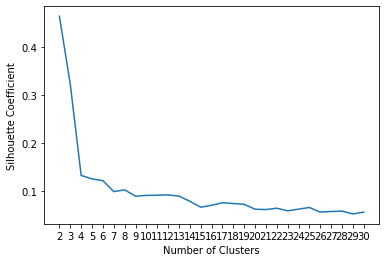

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
sil=[]
K = range(2,31)
for k in K: 
    KMean= KMeans(n_clusters=k).fit(matrix[df_columns]) 
    label=KMean.predict(matrix[df_columns])
    sil.append(silhouette_score(matrix[df_columns], label))
plt.plot(range(2, 31), sil)
plt.xticks(range(2, 31))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0.5, 1.0, 'Cluster of Data')

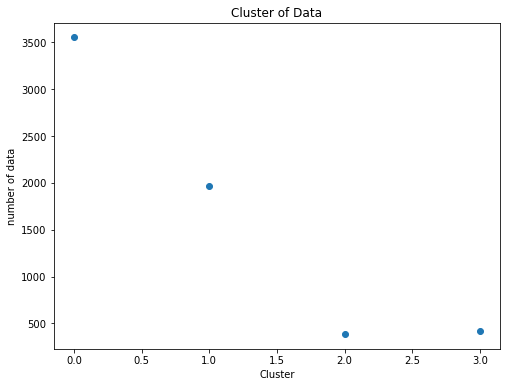

In [ ]:
from sklearn.cluster import KMeans
k = 4
k_cluster = KMeans(
    n_clusters=k, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
data_featured['cluster']=k_cluster.fit_predict(matrix[df_columns])
d = pd.DataFrame(data_featured.cluster.value_counts())
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(d.index,d['cluster'])
plt.xlabel('Cluster')
plt.ylabel('number of data')
plt.title('Cluster of Data')

In [ ]:
# Number of Meter IDs in each cluster
for x in range(k):
    print("Cluster", x, " has meter Ids:  ",len(list(data_featured[data_featured.cluster == x]['Meter ID'])))

Cluster 0  has meter Ids:   3553
Cluster 1  has meter Ids:   1963
Cluster 2  has meter Ids:   387
Cluster 3  has meter Ids:   415


Text(0.5, 1.0, 'Cluster of Data')

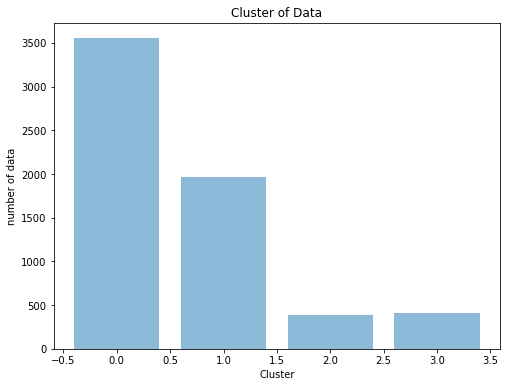

In [ ]:
d = pd.DataFrame(data_featured.cluster.value_counts())
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(d.index,d['cluster'],align='center',alpha=0.5)
plt.xlabel('Cluster')
plt.ylabel('number of data')
plt.title('Cluster of Data')


### Euclidean Distances

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
distance = euclidean_distances(k_cluster.cluster_centers_, k_cluster.cluster_centers_)
distance

array([[0.        , 2.77756359, 8.05369229, 6.10371562],
       [2.77756359, 0.        , 8.33695547, 8.54673418],
       [8.05369229, 8.33695547, 0.        , 8.78209857],
       [6.10371562, 8.54673418, 8.78209857, 0.        ]])

## Visualization Segment

Principal Component Analysis and Visualization with 2D and 3D graphs

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
matrix['x'] = pca.fit_transform(matrix[df_columns])[:,0]
matrix['y'] = pca.fit_transform(matrix[df_columns])[:,1]
matrix['z'] = pca.fit_transform(matrix[df_columns])[:,2]

# Getting the center of each cluster for plotting
cluster_centers = pca.transform(k_cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['x', 'y', 'z'])
cluster_centers['cluster'] = range(0, len(cluster_centers))
print(cluster_centers)

          x         y         z  cluster
0 -0.011927 -0.792437 -0.199001        0
1 -2.065261  0.936502  0.305655        1
2  4.709326  5.670148 -0.385787        2
3  5.499243 -2.949613  0.612844        3


In [ ]:
matrix

,total KW,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend,% January,% Feb,% March,% April,% May,% June,% July,% August,% September,% October,% November,% December,%Q1,%Q2,%Q3,%Q4,Meter ID,x,y,z
0,-0.467861,-0.467861,-0.285548,0.145468,0.343152,-1.044697,-0.290063,0.499697,0.110633,-0.320049,0.320049,0.854666,-0.103835,-0.399959,-0.499276,-0.639911,-0.511516,-0.239918,-0.161802,-0.341916,0.396945,0.054941,0.448341,0.278499,-0.736068,-0.287063,0.530680,1000,0.389158,-1.603435,-0.805601
1,-0.483146,-0.483146,-0.045842,-0.060786,-0.025477,0.286775,0.476500,-0.197484,-0.121942,0.176449,-0.176449,-1.220318,-1.992539,-0.884732,-1.886161,-2.113854,-2.000611,-1.632165,-1.799403,-2.350560,-3.006785,0.872268,8.393951,-1.705323,-2.671081,-2.284631,5.900973,1001,4.828962,-5.332742,-5.298514
2,-0.473713,-0.473713,1.193935,0.028382,1.240299,0.718711,-0.237759,-0.645865,-0.859874,0.871577,-0.871577,0.000536,-0.039482,-0.105279,-0.529595,0.685913,1.049649,0.613631,0.200231,0.083193,-0.729055,0.358340,-0.728081,-0.049502,0.545256,0.351891,-0.701463,1002,0.268253,2.337170,0.288096
3,-0.080091,-0.080091,0.281145,-0.285554,-0.079356,0.099127,-0.209417,0.131939,-0.007338,-0.061159,0.061159,-0.118245,-0.025785,0.408571,0.731255,0.914503,-0.229806,0.004858,-0.175931,-0.146805,-0.015847,-0.146491,-0.286056,0.061479,0.638028,-0.132117,-0.296267,1003,-0.216147,0.182213,1.151350
4,0.244103,0.244103,0.348067,-0.193326,0.055446,-0.421409,-1.101243,0.150153,0.465482,-0.372265,0.372265,-0.471195,-0.473997,-0.523579,-0.602411,0.381763,0.208668,0.497894,0.609960,0.915724,0.417341,-0.227076,-0.546119,-0.603327,0.004696,0.796351,-0.372885,1004,-1.980275,0.346332,-0.576909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,0.035936,0.035936,-0.633475,0.136798,-0.357710,-0.739564,0.103316,-0.550813,1.112982,-0.436030,0.436030,-0.351223,-0.087189,-0.123695,-0.092712,0.173137,0.507095,0.514525,0.244155,0.336839,0.200835,-0.220578,-0.503430,-0.259141,0.261731,0.426024,-0.418464,7440,-1.525014,-0.014932,0.253116
6314,-0.301093,-0.301093,-0.008682,-0.198269,-0.160476,-0.007385,0.001361,0.081352,0.115659,-0.114478,0.114478,0.232703,0.209498,0.032136,-0.234592,-0.258754,-0.327792,-0.234293,0.062064,0.495409,-0.020467,-0.059704,-0.099564,0.214306,-0.364957,0.118595,-0.112549,7441,-0.002668,-0.440816,-0.234403
6315,0.122822,0.122822,-0.683360,-0.114741,0.120348,-0.490462,-0.648149,0.758271,0.217644,-0.517448,0.517448,-0.453486,-0.468561,-0.443037,-0.103370,-0.020795,-0.314205,0.244724,0.116972,0.208905,0.676496,0.441760,-0.076249,-0.565540,-0.192456,0.220471,0.386465,7442,-1.160152,-0.761199,-0.908156
6316,-0.495842,-0.495842,-1.076540,-0.905074,0.444424,-0.299692,-0.604235,-0.194356,1.260407,-0.708094,0.708094,-0.110700,-0.099690,-0.455282,-0.286108,0.205330,0.565994,-0.142244,0.129036,-0.441966,0.020317,0.592606,0.011274,-0.245952,0.218146,-0.151946,0.271463,7443,-1.021152,-1.367935,-0.004793


Text(0.5, 1.0, 'Data Segmentation')

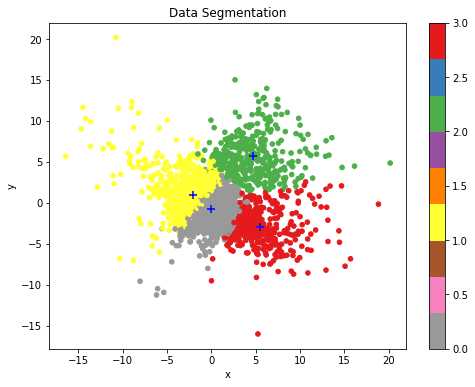

In [ ]:
# Plotting for 2-dimention for k from BIC method
fig, ax = plt.subplots(figsize=(8, 6))
scatter=ax.scatter(matrix['x'],matrix['y'],c=data_featured['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],s=70,c='blue',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
plt.title('Data Segmentation')

Text(0.5, 0.92, 'Data Segmentation')

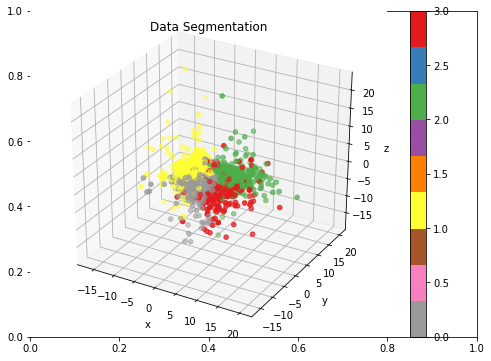

In [ ]:
# Plotting for 3-Dimention - for BIC
fig, ax = plt.subplots(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
scatter=ax.scatter(matrix['x'],matrix['y'],matrix['z'],c=data_featured['cluster'],s=21,cmap=plt.cm.Set1_r)
ax.scatter(cluster_centers['x'],cluster_centers['y'],cluster_centers['z'],s=70,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.colorbar(scatter)
plt.title('Data Segmentation')

TSNE (t-Distributed Stocastic Neighbour Embedding) and Visualization with 2D and 3D graphs

In [ ]:
import numpy as np 
from sklearn.manifold import TSNE
m = TSNE(n_components=2, random_state=0)
tsne_features = m.fit_transform(matrix[df_columns])
#tsne_features[1:4, :]
matrix['x'] = tsne_features[:,0]
matrix['y'] = tsne_features[:,1]
#matrix['z'] = tsne_features[:,2]
tsne_features

array([[-33.85137  ,   0.1847958],
       [-61.60556  , -10.082878 ],
       [ 19.112791 , -28.35765  ],
       ...,
       [-10.550826 ,  25.828432 ],
       [ -2.082222 ,  30.057465 ],
       [ -1.5805767,  -1.9339212]], dtype=float32)

Text(0.5, 1.0, 'Data Segmentation')

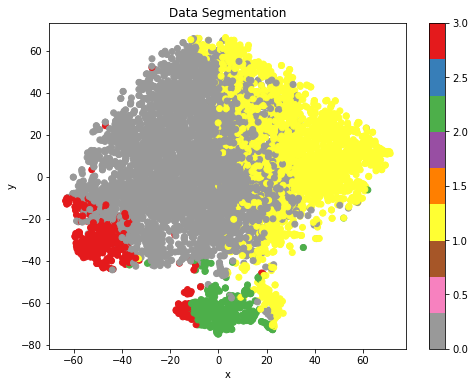

In [ ]:
# Plotting for 2-dimention TSNE 
fig, ax = plt.subplots(figsize=(8, 6))
scatter=ax.scatter(matrix['x'],matrix['y'],c=data_featured['cluster'],cmap=plt.cm.Set1_r)
#ax.scatter(cluster_centers['x'],cluster_centers['y'],s=70,c='blue',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
plt.title('Data Segmentation')

Text(0.5, 0.92, 'Data Segmentation')

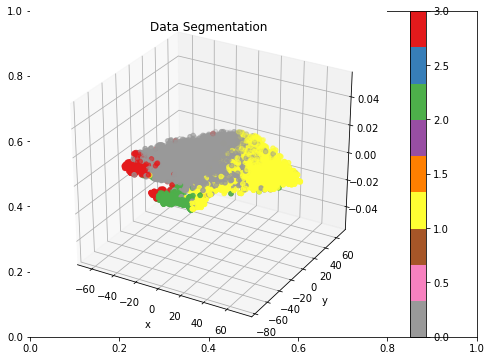

In [ ]:
# Plotting for 3-Dimention - TSNE
fig, ax = plt.subplots(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
scatter=ax.scatter(matrix['x'],matrix['y'],c=data_featured['cluster'],s=21,cmap=plt.cm.Set1_r)
#ax.scatter(cluster_centers['x'],cluster_centers['y'],cluster_centers['z'],s=70,c='red',marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
plt.title('Data Segmentation')

TSNE and PCA are two dimentionality reduction analysis techniques and the aim of the both techniques is to fir and transform the data to better fit for visualization.
- TENE is a random state variable and it only supports 2 dimentions
- TSNE is also a randomized algorithm so we always have to set the random state as 0 otherwise you may witness a different plot each time.
- TSEE does not work well with the non-numeric values. 
- It also does not preserve the distance nor density.
For the following said reasons we are choosing the PCA for better plotting and visualization of our data. 

References:

https://reneshbedre.github.io/blog/tsne.html
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

By the plots above, we can see that all segments are separated well from each other. It means that BIC method works good for this project.

### The behavior of each segment:

In [ ]:
behavior = data_featured[data_featured.columns[1:]].groupby(['cluster']).agg([np.mean])
behavior

,total KW,average per day,% Monday,% Tuesday,% Wednesday,% Thursday,% Friday,% Saturday,% Sunday,% weekday,% weekend,% January,% Feb,% March,% April,% May,% June,% July,% August,% September,% October,% November,% December,%Q1,%Q2,%Q3,%Q4
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14202.760162,26.497687,14.093519,14.180071,14.092627,13.949974,14.066659,14.700053,14.917096,70.382851,29.617149,7.082957,5.802749,5.868346,5.062538,4.978173,4.541405,7.539768,9.873463,10.170542,11.480931,12.551808,15.047320,18.754052,14.582115,27.583773,39.080060
1,18399.751945,34.327895,14.012501,14.205903,14.098070,14.049773,14.200677,14.775135,14.657941,70.566923,29.433077,5.941376,5.082087,5.462433,5.301973,5.572194,5.531758,9.385597,11.919145,11.116292,11.303150,10.998804,12.385193,16.485896,16.405924,32.421033,34.687147
2,58082.752434,108.363344,15.801448,17.748882,17.401937,17.323869,16.086721,9.225783,6.411360,84.362857,15.637143,7.262617,6.867097,6.785730,5.616224,5.057803,4.628479,7.809074,9.308523,10.086288,10.874624,12.705021,12.998520,20.915445,15.302505,27.203885,36.578165
3,19372.514946,36.142752,14.274130,14.787209,14.514051,14.624524,14.494205,13.889315,13.416566,72.694119,27.305881,11.234977,8.776797,7.604126,4.813638,3.669933,2.768027,4.707574,6.307929,7.013662,9.308546,13.458542,20.336250,27.615900,11.251597,18.029165,43.103338


### Creating new Data frames on the basis of cluster 

In [ ]:
data_featured['cluster'].unique()

array([0, 3, 1, 2], dtype=int32)

In [ ]:
def cluster_df_creater(k, df, data_featured):
    clusters_dis = {}
    for x in k:
        data_cluster = pd.DataFrame({'date': df['date']})
        ls = list(data_featured[data_featured.cluster == x]['Meter ID'])
   #     print(x)
  #      print(len(ls))
     #   id_ls=[]
   #     for x1 in ls:
    #        id_ls.append(x1))
        for meter_id in ls:
            data_cluster[meter_id] = df[meter_id]
        
       # uniq_meter_ids = data_cluster.columns[1:] #Just selec
        data_cluster['average per day in cluster'] = data_cluster.mean(axis=1)
        clusters_dis[x] = data_cluster
        del data_cluster
    return clusters_dis

In [ ]:
clusters_dis = cluster_df_creater(k=data_featured['cluster'].unique(), df=df_mean, data_featured=data_featured)

In [ ]:
clusters_dis[0]

,date,1000,1003,1005,1008,1009,1010,1011,1013,1014,1024,1025,1027,1029,1030,1031,1037,1039,1043,1045,1052,1057,1058,1059,1062,1063,1065,1066,1067,1068,1073,1075,1076,1077,1078,1079,1080,1081,1082,1084,1085,1087,1088,1091,1094,1095,1096,1097,1098,1099,1100,1105,1106,1107,1108,1109,1110,1111,1115,1117,1119,1120,1121,1123,1124,1125,1126,1128,1129,1130,1131,1134,1139,1140,1143,1144,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1160,1164,1165,1168,1170,1173,1174,1175,1176,1180,1182,1185,1186,1187,1188,1189,1191,1192,1194,1196,1197,1198,1203,1205,1207,1208,1209,1212,1213,1214,1215,1218,1219,1222,1224,1225,1226,1227,1229,1232,1234,1235,1236,1240,1247,1251,1255,1257,1259,1260,1264,1268,1270,1271,1272,1273,1274,1275,1278,1279,1280,1283,1284,1286,1289,1290,1292,1293,1294,1295,1296,1297,1299,1303,1305,1306,1308,1309,1311,1314,1315,1317,1321,1323,1325,1326,1327,1328,1332,1333,1334,1336,1337,1338,1339,1341,1342,1343,1344,1348,1349,1351,1355,1360,1361,1367,1368,1371,1373,1374,1375,1377,1379,1380,1381,1383,1384,1387,1389,1390,1393,1395,1397,1398,1399,1402,1403,1404,1405,1406,1409,1411,1412,1413,1416,1421,1422,1425,1426,1428,1429,1431,1432,1434,1435,1436,1438,1442,1444,1445,1446,1448,1450,1452,1454,1458,1459,1460,1463,1464,1465,1466,1468,1469,...,6997,6999,7001,7002,7003,7004,7005,7006,7008,7009,7010,7011,7012,7013,7014,7017,7020,7021,7025,7026,7027,7028,7029,7030,7033,7035,7036,7037,7039,7040,7044,7046,7047,7048,7050,7052,7054,7061,7062,7068,7070,7072,7074,7075,7076,7081,7084,7085,7086,7088,7090,7091,7093,7095,7099,7103,7106,7107,7108,7109,7110,7114,7115,7117,7118,7119,7121,7123,7124,7125,7127,7128,7129,7130,7131,7132,7133,7135,7136,7137,7139,7141,7142,7145,7146,7147,7149,7150,7151,7154,7156,7159,7161,7163,7164,7165,7169,7170,7171,7174,7175,7179,7180,7181,7183,7186,7187,7190,7196,7197,7199,7200,7202,7203,7204,7205,7212,7218,7219,7220,7223,7225,7227,7228,7229,7230,7232,7233,7234,7239,7241,7243,7246,7247,7249,7250,7253,7254,7255,7256,7262,7263,7264,7265,7266,7267,7268,7269,7270,7273,7279,7280,7281,7283,7284,7286,7288,7289,7290,7293,7294,7296,7297,7298,7303,7305,7306,7307,7308,7309,7310,7311,7312,7315,7316,7318,7319,7320,7322,7323,7324,7326,7329,7330,7331,7333,7334,7335,7336,7337,7341,7343,7344,7345,7346,7349,7351,7352,7353,7354,7358,7359,7362,7366,7367,7368,7371,7372,7374,7375,7376,7377,7378,7381,7384,7385,7386,7388,7391,7393,7394,7399,7400,7401,7402,7404,7405,7408,7409,7411,7414,7415,7416,7417,7421,7422,7423,7424,7428,7430,7432,7435,7436,7437,7438,7441,7442,7443,7444,average per day in cluster
0,2009-07-14,11.203,24.183,17.765,27.217,51.865,38.259000,49.38700,16.889,34.085,11.801,2.838,6.592,3.603,18.871,3.956,11.457,32.991,12.175000,11.422,15.206,34.405,13.358,34.338,21.257,25.373,4.265,39.746033,21.095,30.803,43.316,5.125,20.806,15.858,10.591,37.904,15.448,11.246,17.225,9.086,20.755,13.717,8.139,41.014,30.335,9.719,26.899,40.104,10.554,9.935,22.986,44.428,15.256000,4.362,50.724,70.316,13.777,20.557,11.245,42.334,33.677,4.086,8.326,12.645,5.796,48.544338,10.493,24.830,39.093748,34.353,18.768000,27.316,29.965,22.189,31.844,24.987,21.220,10.747,22.090000,56.229634,18.124,5.013,21.668,39.499,11.709,33.609,9.286,31.563,13.086,27.017,20.372,22.415000,17.247,62.404,30.225,24.595,4.768,24.609,52.842,30.877243,24.958,46.474,14.853,10.618,15.387000,29.798,6.997,17.057,51.187,17.268,14.062,0.384,23.938000,16.779,14.694,7.455,26.935,13.462,34.251,18.143,11.092,19.164,20.451,80.164,22.931,16.994,17.057,22.659,15.344,27.698,15.165,32.123,14.781,13.627,33.759,30.402,28.743,11.902,12.930,49.511,46.106,17.817,21.634,0.000,41.840,8.406,46.426,6.239,14.620,16.417,27.307000,20.207,11.237,34.389,14.690,7.969,27.893,18.187,20.240,17.603,6.064,31.652,5.42900,12.198,26.163,38.441,14.691,19.669,22.835,26.575,19.257,35.224,8.716,17.443,23.759,100.413,15.600,19.221,7.493,58.192,31.741,22.368,19.170,46.203,26.987,47.650,39.544,53.966,22.644,28.752,15.999,8.841,15.920,39.310,8.795,29.958,38.309,14.848,9.215,6.583,15.704,53.651,16.638,5.214,1.356,29.488,11.246,14.70

### STL Decomposition 

In [ ]:
from pylab import rcParams
import statsmodels.api as sm

def stl_decompose(dis):
    for key, val in dis.items():
        print(key)
        stl_data = pd.DataFrame({'date': val['date'],'average per day in cluster': val['average per day in cluster']})
        stl_data['date'] = pd.to_datetime(stl_data['date'])
        rcParams['figure.figsize'] = 12, 10
        decomposition = sm.tsa.seasonal_decompose(val['average per day in cluster'].values, model='additive', freq=100) # additive seasonal index
        fig = decomposition.plot()
        plt.show()
       # print(stl_data)

0


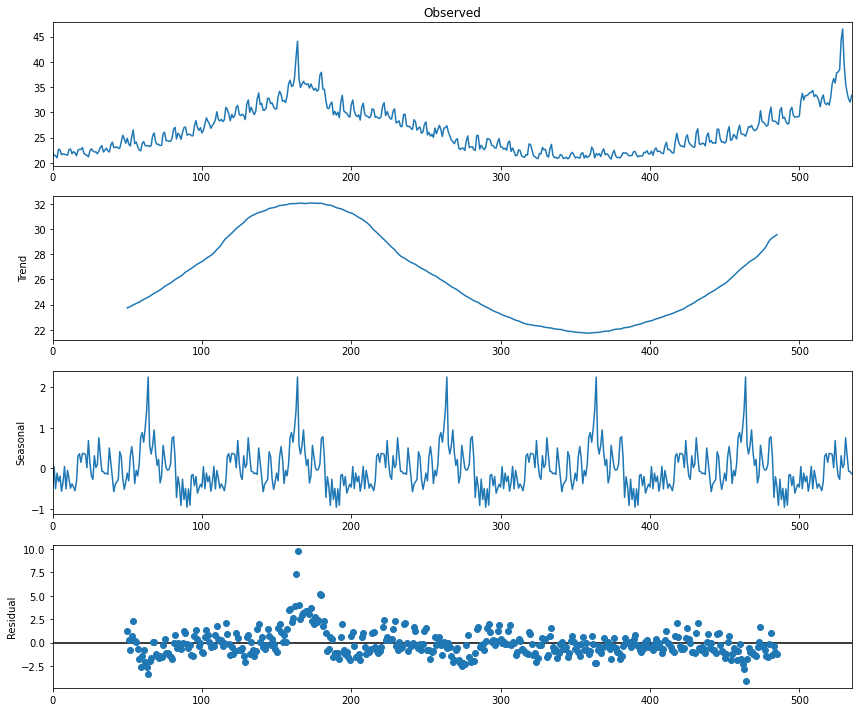

3


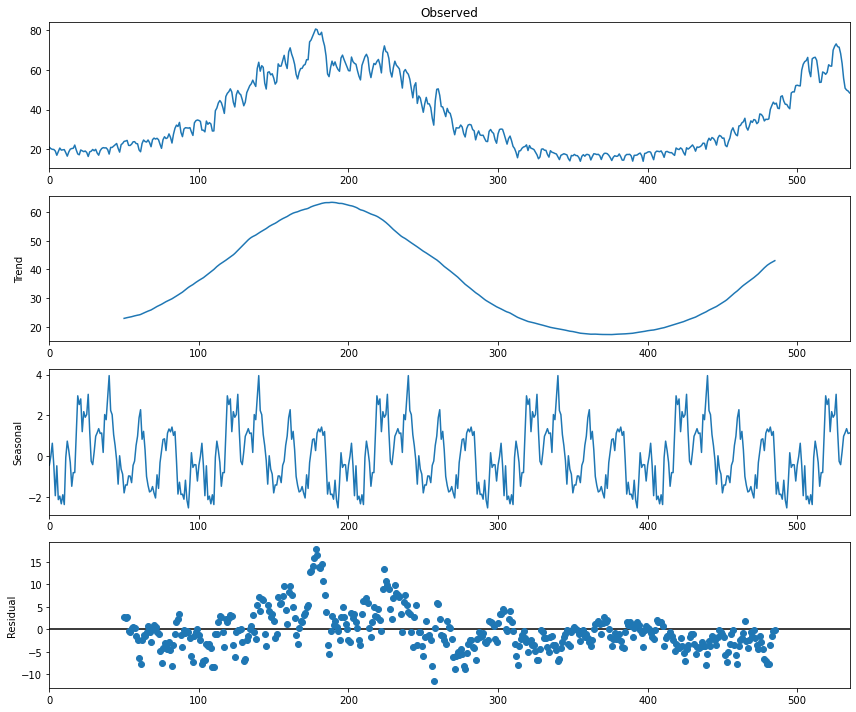

1


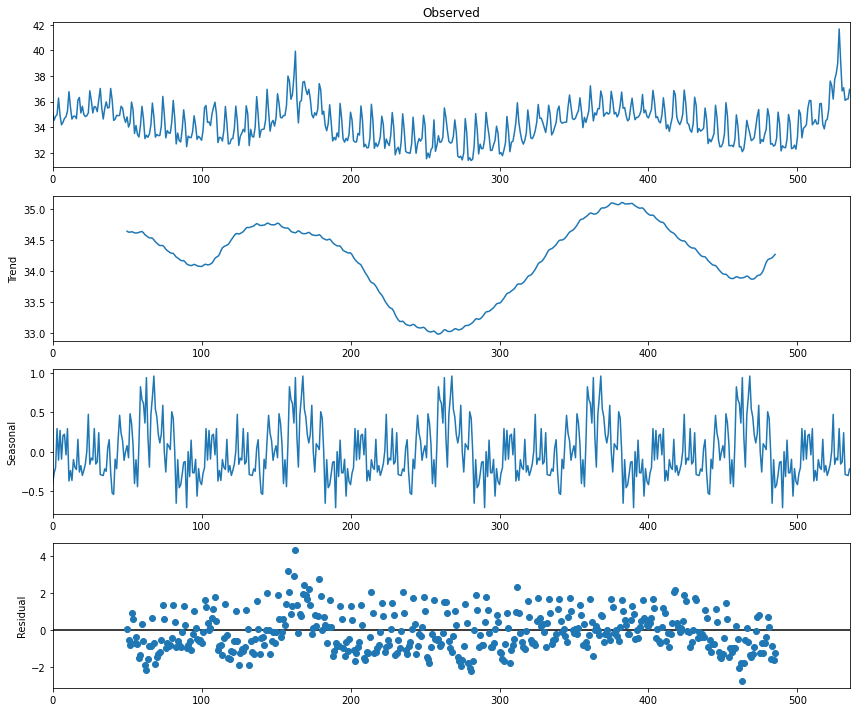

2


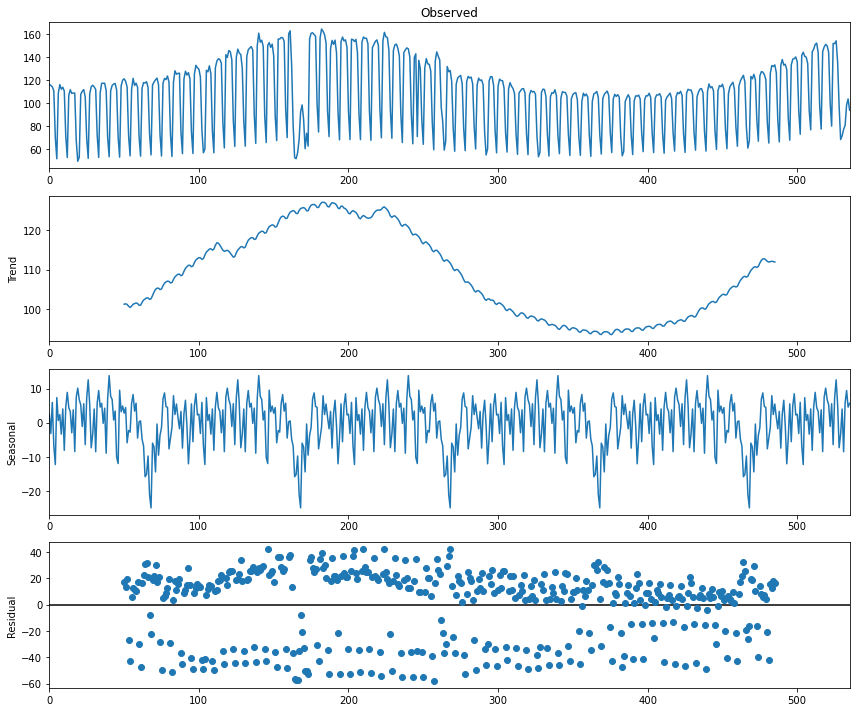

In [ ]:
stl_decompose(dis = clusters_dis)

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from sklearn.metrics import r2_score
from keras.utils import plot_model

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# load the dataset
def lstm_model(nCluster):
    dataframe = clusters_dis[nCluster]['average per day in cluster']
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    dataset = [[i] for i in dataset]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    train_size = int(len(dataset) * 0.84)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    print(len(train), len(test))
    

    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(dataset=train, look_back=look_back)
    testX, testY = create_dataset(dataset=test, look_back=look_back)
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
        # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(100, input_shape=(1, look_back)))
    model.add(Dense(1))
    #model.add(BatchNormalization())
    model.compile(loss='mae', optimizer='adam')
    model.fit(trainX, trainY, epochs=20, batch_size=10, verbose=1)
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

    r_sq = r2_score(testY[0], testPredict[:,0])
    print('Test Score: %.2f RMSE' % (testScore))
    print('R Squared: %.2f ' % (r_sq))
    
    


    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    #print(trainPredictPlot)

    # plot baseline and predictions
    plt.rcParams['figure.figsize'] = [15, 8]

    #dataset1.plot(x='date', y='total daily KW', style='-')
    #clusters_dis[0].plot(x='date', y='average per day in cluster', style='-')
    #plt.plot(dataset1)
    plt.plot(clusters_dis[nCluster]['average per day in cluster'])
    plt.plot(trainPredictPlot, color='yellow')
    plt.plot(testPredictPlot, color='red')
    plt.title("Machine Learned the Pattern Predicting Future Values")
    plt.grid()
    plt.show()

    #plot_model(model, to_file='model.png')
    fig, axs = plt.subplots(3)
    fig.suptitle('Vertically stacked subplots')
    axs[0].title.set_text('Actual Data')
    axs[0].plot(clusters_dis[nCluster]['average per day in cluster'])
    axs[0].grid()
    axs[1].title.set_text('Training Data')
    axs[1].plot(trainPredictPlot)
    axs[1].grid()
    axs[2].title.set_text('Predicted Data')
    axs[2].plot(testPredictPlot)
    axs[2].grid()
    plt.show()

## Cluster 0

450 86
Epoch 1/20
45/45 [==============================] - 0s 3ms/step - loss: 0.1312
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0946
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0636
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 5/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0318
Epoch 6/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 7/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 8/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0321
Epoch 9/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0316
Epoch 10/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0317
Epoch 11/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0317
Epoch 12/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 13/20
45/45 [=======================

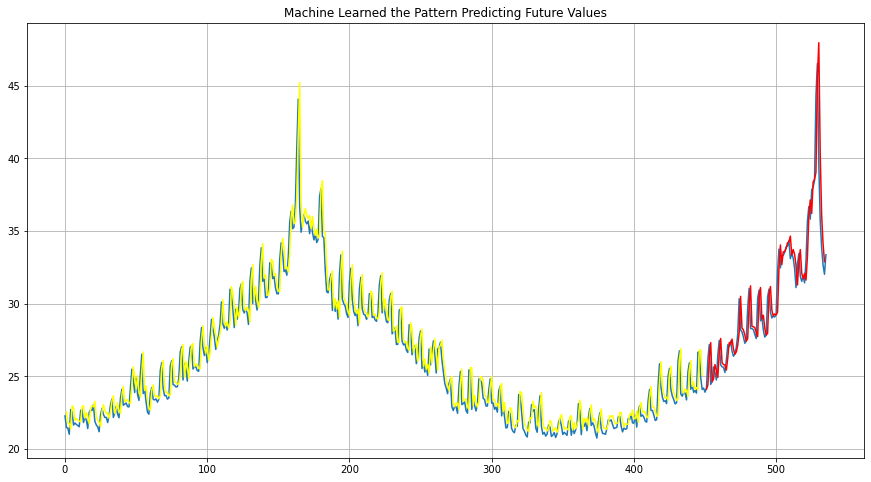

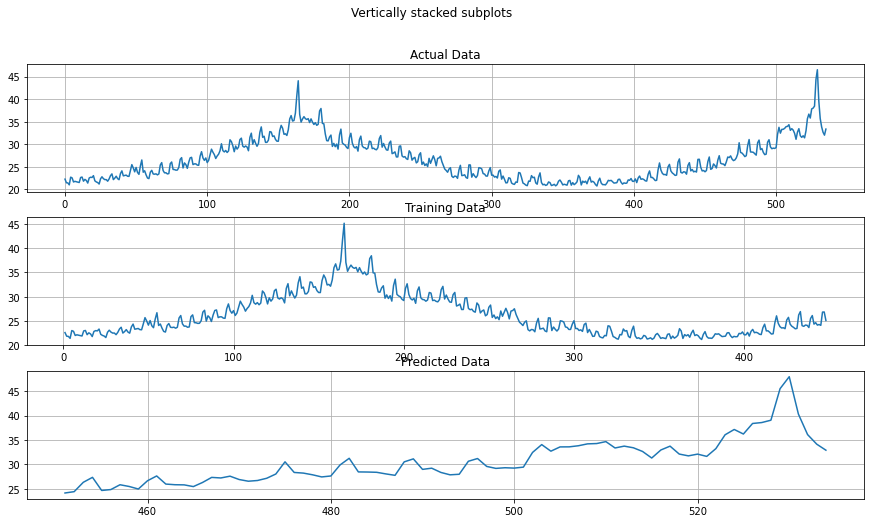

In [ ]:
lstm_model(0)

### Cluster 1

450 86
Epoch 1/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1863
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0910
Epoch 3/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0854
Epoch 4/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0817
Epoch 5/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0783
Epoch 6/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0762
Epoch 7/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0748
Epoch 8/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0735
Epoch 9/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0737
Epoch 10/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0726
Epoch 11/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0733
Epoch 12/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0731
Epoch 13/20
45/45 [=======================

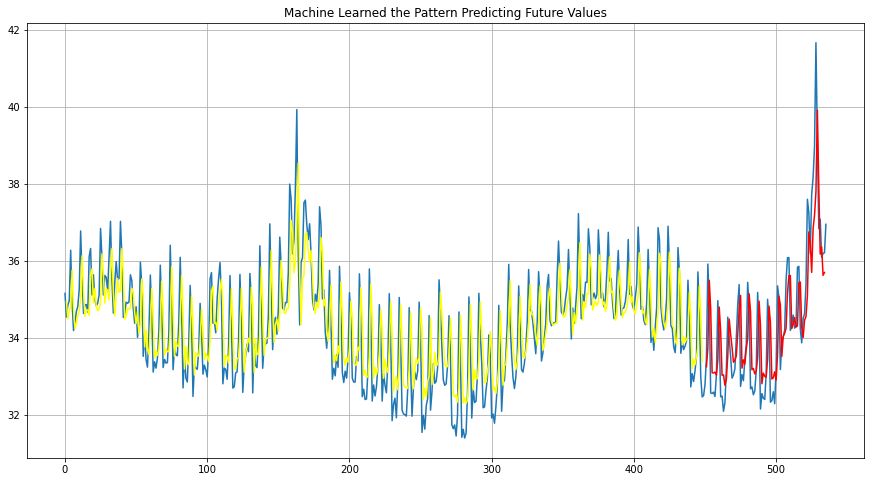

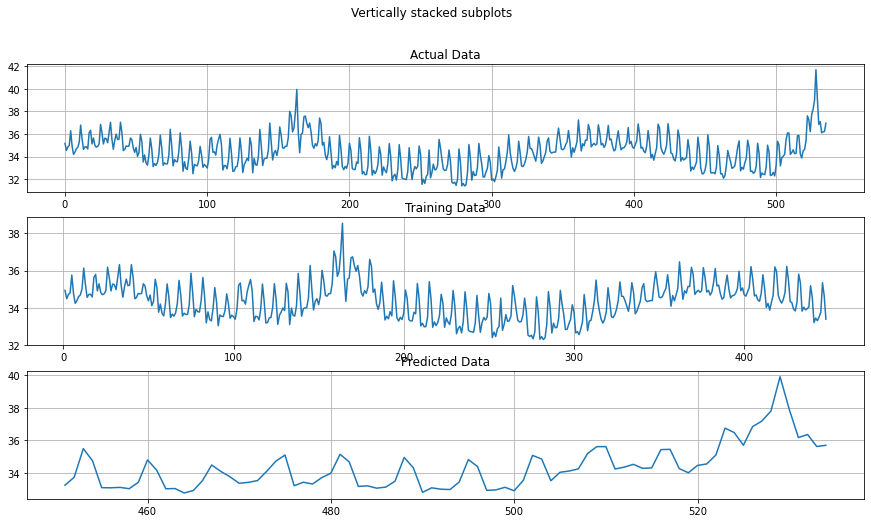

In [ ]:
lstm_model(1)

### Cluster 2

450 86
Epoch 1/20
45/45 [==============================] - 0s 6ms/step - loss: 0.4016
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 0.2337
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1875
Epoch 4/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1858
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1837
Epoch 6/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1821
Epoch 7/20
45/45 [==============================] - 0s 3ms/step - loss: 0.1799
Epoch 8/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1786
Epoch 9/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1765
Epoch 10/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1746
Epoch 11/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1728
Epoch 12/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1713
Epoch 13/20
45/45 [=======================

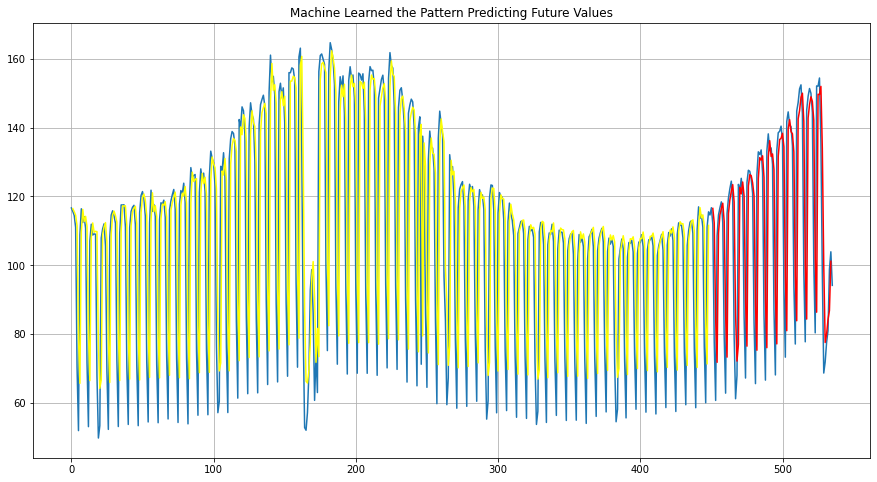

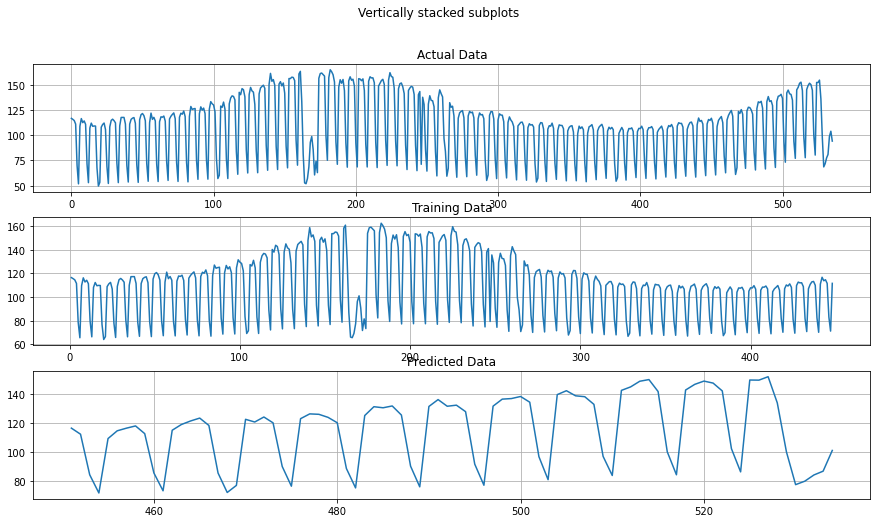

In [ ]:
lstm_model(2)

### Cluster 3

450 86
Epoch 1/20
45/45 [==============================] - 0s 3ms/step - loss: 0.2208
Epoch 2/20
45/45 [==============================] - 0s 3ms/step - loss: 0.1463
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0824
Epoch 4/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0323
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0303
Epoch 6/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0304
Epoch 7/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 8/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0305
Epoch 9/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0304
Epoch 10/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 11/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0302
Epoch 12/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0303
Epoch 13/20
45/45 [=======================

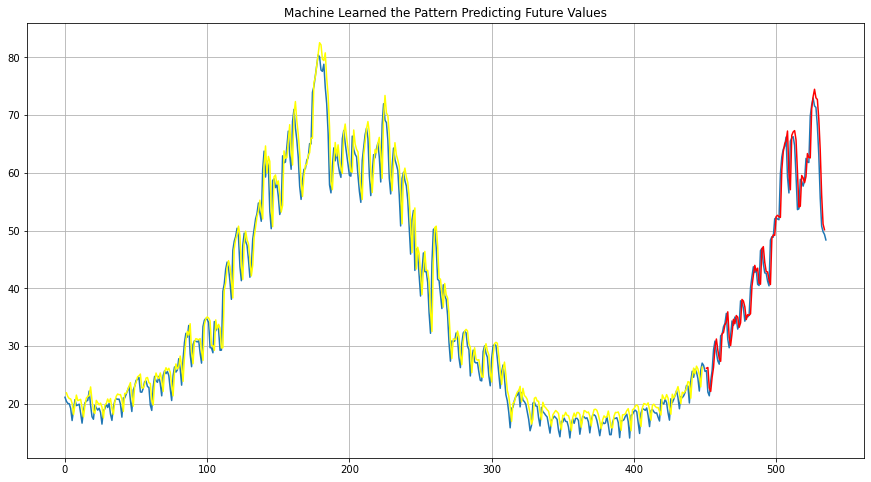

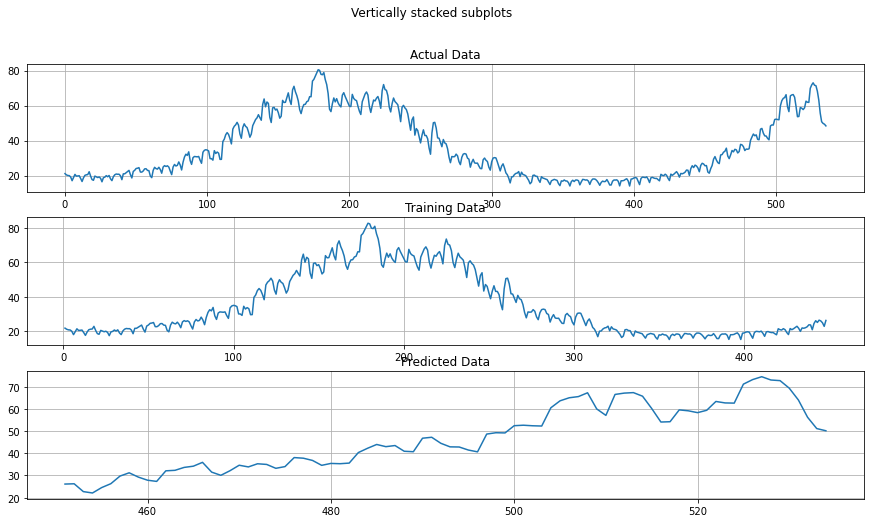

In [ ]:
lstm_model(3)